Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d (Conv3D)              (None, 2, 512, 64, 64)    8064      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 2, 512, 64, 64)    0         
_________________________________________________________________
dropout (Dropout)            (None, 2, 512, 64, 64)    0         
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 2, 256, 32, 64)    110656    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 2, 256, 32, 64)    0         
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 2, 128, 16, 64)    110656    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 2, 128, 16, 64)    0

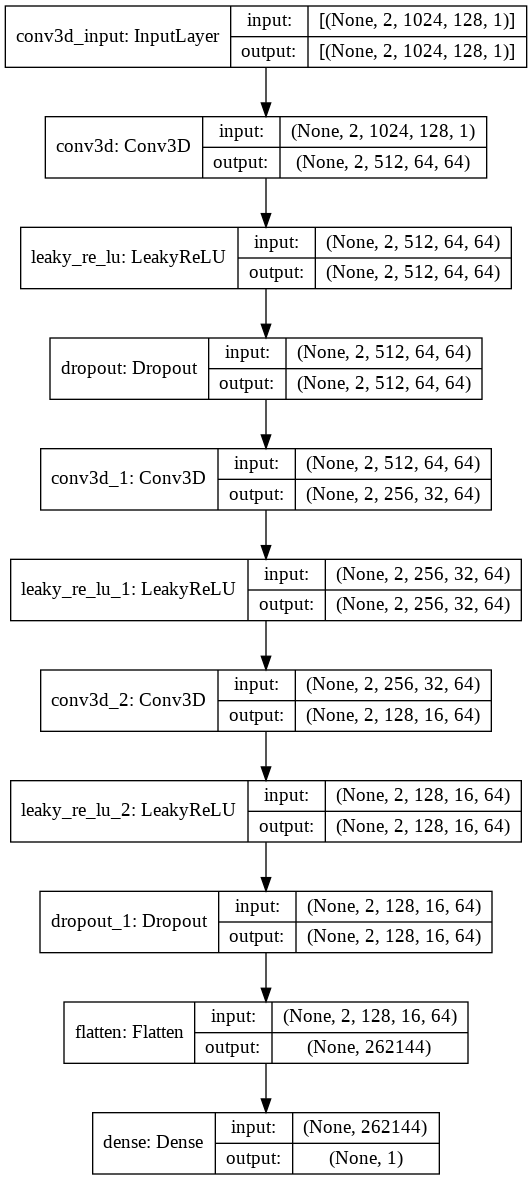

In [ ]:
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Conv3D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LeakyReLU
from keras.utils.vis_utils import plot_model

# define the standalone discriminator model
def define_discriminator(in_shape=(2,1024,128,1)):
    model = Sequential()
    model.add(Conv3D(64, (5,5,5), strides=(1, 2, 2), padding='same', input_shape=in_shape))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))
    model.add(Conv3D(64, (3,3,3), strides=(1, 2, 2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv3D(64, (3,3,3), strides=(1, 2, 2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    opt = Adam(lr=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

# define model
model = define_discriminator()
# summarize the model
model.summary()
# plot the model
plot_model(model, to_file='discriminator_plot.png', show_shapes=True, show_layer_names=True)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32768)             3309568   
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 32768)             0         
_________________________________________________________________
reshape (Reshape)            (None, 2, 64, 8, 32)      0         
_________________________________________________________________
conv3d_transpose (Conv3DTran (None, 2, 128, 16, 64)    256064    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 2, 128, 16, 64)    0         
_________________________________________________________________
conv3d_transpose_1 (Conv3DTr (None, 2, 256, 32, 64)    32832     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 2, 256, 32, 64)    0

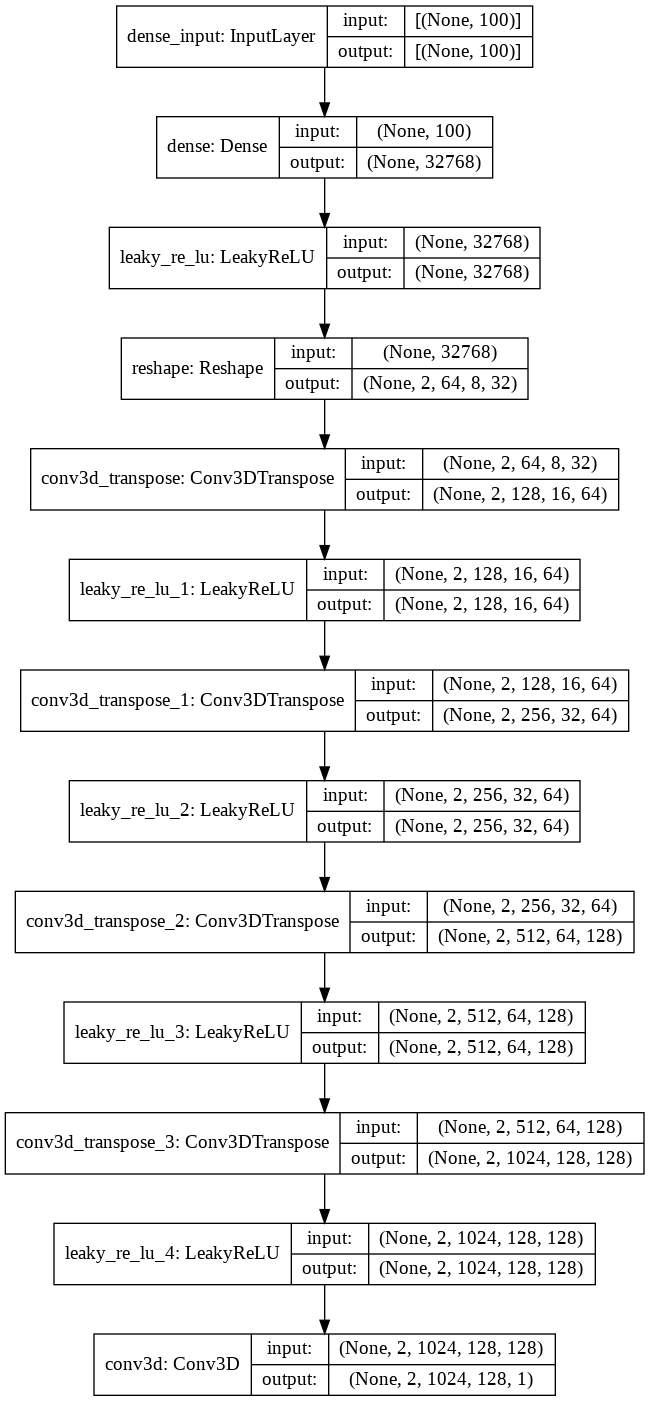

In [1]:
# example of defining the generator model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import Conv3D
from keras.layers import Conv3DTranspose
from keras.layers import LeakyReLU
from keras.utils.vis_utils import plot_model

# define the standalone generator model
def define_generator(latent_dim):
  model = Sequential()
  # foundation for 7x7 image
  n_nodes = 2 * 64 * 8 * 32
  model.add(Dense(n_nodes, input_dim=latent_dim))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Reshape((2, 64, 8, 32)))
  # upsample to 14x14
  model.add(Conv3DTranspose(64, (5,5,5), strides=(1,2,2), padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  # upsample to 28x28
  model.add(Conv3DTranspose(64, (2,2,2), strides=(1,2,2), padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Conv3DTranspose(128, (2,2,2), strides=(1,2,2), padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Conv3DTranspose(128, (2,2,2), strides=(1,2,2), padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Conv3D(1, (5,5,5), activation='sigmoid', padding='same'))
  return model

# define the size of the latent space
latent_dim = 100
# define the generator model
model = define_generator(latent_dim)
# summarize the model
model.summary()
# plot the model
plot_model(model, to_file='generator_plot.png', show_shapes=True, show_layer_names=True)